In [0]:
#Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
from PIL import Image

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/ML/comp.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

KeyboardInterrupt: ignored

In [0]:
a=[]
import os
a=os.listdir("/tmp/comp/cat")
count=0
imagearr=[]
name=[]
for i in a:
    clear_output(wait=True)
    dir="/tmp/comp/cat/"
    dir=dir+i
    b=os.listdir(dir)
    for j in b:
        name.append(i)
        g=(dir+"/"+j)
        img = Image.open(g)
        l,b=img.size
        area=l*b
        if(area<=36*52):
            img=img.resize((100,100))
        img.thumbnail((52,36),Image.ANTIALIAS)
        img=img.resize((52,36))
        img = np.array(img)
        img = img[:,:,:3]
        imagearr.append(img)
    if (count%100)==0:
      print(count)
    count=count+1
# x=[]
#  for i in imagearr:
#      x.append(i.flatten("F"))

5700


In [0]:
np.shape(imagearr)

(13233, 36, 52, 3)

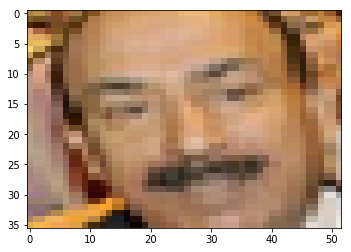

In [0]:
plt.imshow(imagearr[0])

In [0]:
#Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def scale_range (input, min=0, max=1):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

In [0]:
# aqua=[[1,2,3]]
# aqua.append([4,5,6])
# aqua=np.array(aqua)
# aqua.flatten("C")

In [0]:
boom=[]
for i in imagearr:
    lol=(i.flatten('C'))
    lol=lol.astype(float)
    boom.append(scale_range(lol))
imagearr=[]

NameError: ignored

In [0]:
# for i in boom:
#   clear_output(wait=True)
#   i=i.reshape(72,72,3)
#   plt.imshow(i)
#   plt.show()

In [0]:
def give_data(batch_size):
  x_batch=[]
  y_batch=[]
  same=0
  good=0
  diff=0
  for i in range(0,batch_size):
      rand1=random.randint(0,13200)
      rand2=random.randint(0,13200)
      #rand3=random.randint(0,13231)
      z=[]
      z.append(rand1-1)
      z.append(rand1+1)
      z.append(rand1)
      z.append(rand2)
      k=random.choice(z)
      v=random.choice(z)
      n=[]
      n.append(boom[k])
      n.append(boom[v])
      n=np.array(n)
      n=n.flatten('C')
      n=n.flatten('F')
      n=np.array(n)
      x_batch.append(n)
      if (name[v]==name[k]):
          y_batch.append([0,1])
      else:
          y_batch.append([1,0])
  return x_batch,y_batch

In [0]:
def init_weights(shape):
  init_random_dist=tf.truncated_normal(shape,stddev=0.1)
  return tf.Variable(init_random_dist)

In [0]:
def init_bias(shape):
  init_bias_vals=tf.constant(0.1,shape=shape)
  return tf.Variable(init_bias_vals)

In [0]:
def conv2d(x,W):
  #x=[batch,H,w,Channels]
  #W=[filterH,filterW,channelsIN,channelsout]
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [0]:
def max_pool(x):
  #x=[batch,H,w,Channels]
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

In [0]:
def convolutional_layer(input_x,shape):
  W=init_weights(shape)
  b=init_bias([shape[3]])
  return tf.nn.relu(conv2d(input_x,W) + b)

In [0]:
def normal_full_layer(input_layer,size):
  input_size=int(input_layer.get_shape()[1])
  W=init_weights([input_size,size])
  b=init_bias([size])
  return tf.matmul(input_layer,W)+b

In [0]:
72*56*3

12096

In [0]:
x=tf.placeholder(tf.float32,shape=[None,11232])

In [0]:
y_true=tf.placeholder(tf.float32,shape=[None,2])

In [0]:
x_image = tf.reshape(x,[-1,72,52,3])

In [0]:

convo_1 = convolutional_layer(x_image,shape=[7,7,3,32])
convo_1_pooling=max_pool(convo_1)

In [0]:
convo_2=convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling=max_pool(convo_2)

In [0]:
convo_3=convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_3_pooling=max_pool(convo_3)

In [0]:
convo_4=convolutional_layer(convo_3_pooling,shape=[3,3,128,128])
convo_4_pooling=max_pool(convo_4)

In [0]:
convo_5=convolutional_layer(convo_4_pooling,shape=[2,2,128,256])
convo_5_pooling=max_pool(convo_5)

In [0]:
convo_5_flat =tf.reshape(convo_5_pooling,[-1,3*2*256])
full_layer_one=tf.nn.relu(normal_full_layer(convo_5_flat,160))

In [0]:
hold_prob1=tf.placeholder(tf.float32)
full_one_droupout=tf.nn.dropout(full_layer_one,keep_prob=hold_prob1)

W0711 11:44:03.876386 140033030719360 deprecation.py:506] From <ipython-input-23-166fc3bc9bce>:2: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y_pred=normal_full_layer(full_one_droupout,2)

In [0]:
cross_entrophy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

W0711 11:44:04.436798 140033030719360 deprecation.py:323] From <ipython-input-25-bd68ccb49d38>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(cross_entrophy)

In [0]:
init=tf.global_variables_initializer()

In [0]:
def scale_range (input, min=0, max=1):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

In [0]:
saver = tf.train.Saver()

In [0]:
steps=500000
accu=[]
icou=[]
act=[]
with tf.Session() as sess:
  sess.run(init)
  for i in range(steps):
    batch_x,batch_y= give_data(10)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob1:0.7})
    if ((i%200)==0):
        clear_output(wait=True)
        x_test,y_test=give_data(500)
        print("On step:{}".format(i))
        print("Accuracy:")
        matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
        acc=tf.reduce_mean(tf.cast(matches,tf.float32))
        quatl=sess.run(acc,feed_dict={x:x_test,y_true:y_test,hold_prob1:1.0})
        accu.append(quatl)
        a,b=give_data(1)
        act.append((sum(accu)/(len(accu)+1)))
        
        print(act[-1])
        print('\n')
        print(accu[-1])
        
        print(sess.run(cross_entrophy,feed_dict={x:a,y_true:b,hold_prob1:1.0}))
        print(sess.run(y_pred,feed_dict={x:a,y_true:b,hold_prob1:1.0}))
        print(b)
        icou.append(i)
        save_path = saver.save(sess, "/content/drive/My Drive/ML")
        print("Model saved in path: %s" % save_path)
#         plt.plot(icou,accu,'r')
#         plt.plot(icou,act,"g")
#         plt.show()

On step:499800
Accuracy:
0.8368140745644377


0.882
0.013338146
[[ 1.9094409 -2.4010096]]
[[1, 0]]
Model saved in path: /content/drive/My Drive/ML


In [0]:
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "/content/drive/My Drive/ML")
  print("Model restored.")
  clear_output(wait=True)
  z=[]
  z.append(boom[0])
  z.append(boom[1])
  z=np.array(z)
  z=z.flatten('C')
  z=z.flatten('F')
  z=np.array(z).reshape(1,11232)
  k=np.array([1,0]).reshape(1,2)
  x_test,y_test=z,k
  print("Accuracy:")
  matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
  acc=tf.reduce_mean(tf.cast(matches,tf.float32))
  print(sess.run(acc,feed_dict={x:x_test,y_true:y_test,hold_prob1:1.0}))
  print(sess.run(y_pred,feed_dict={x:x_test,y_true:y_test,hold_prob1:1.0}))
  
  


Accuracy:
0.0
[[-0.559456   2.9316597]]


In [0]:
boom=[]
imagearr=[]

In [0]:


img = Image.open('/content/drive/My Drive/ML/test /processed6.png')
l,b=img.size
area=l*b
if(area<=36*52):
    img=img.resize((100,100))
img.thumbnail((52,36),Image.ANTIALIAS)
img=img.resize((52,36))
img = np.array(img)
img = img[:,:,:3]
imagearr.append(img)

In [0]:
boom=[]
for i in imagearr:
    lol=(i.flatten('C'))
    lol=lol.astype(float)
    boom.append(scale_range(lol))
imagearr=[]

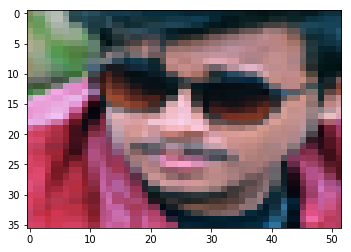

In [0]:

plt.imshow(imagearr[2])

In [0]:
sum(accu)

In [0]:
i